In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Import Combined Cleaned Kaggle Data
df = pd.read_csv('Cleaned_Combined_Kaggle_Data.csv')
df.head()

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
0,23.0,Male,France,Master’s degree,Software Engineer,2.0,34999.5
1,42.0,Male,India,Professional degree,Software Engineer,0.0,6249.5
2,42.0,Male,Australia,Master’s degree,Other,2.0,274999.5
3,52.0,Male,France,Master’s degree,Data Scientist,20.0,64999.5
4,23.0,Male,India,Master’s degree,Data Scientist,5.0,12499.5


In [3]:
# Using on US data 
US_df = df[df['Country'] == 'United States of America']
US_df

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
5,23.0,Female,United States of America,Bachelor’s degree,Data Scientist,5.0,84999.5
8,32.0,Male,United States of America,Master’s degree,Product/Project Manager,5.0,94999.5
9,52.0,Female,United States of America,Master’s degree,Data Analyst,20.0,137499.5
12,37.0,Male,United States of America,Bachelor’s degree,Other,10.0,137499.5
19,32.0,Female,United States of America,Master’s degree,Research Scientist,10.0,174999.5
...,...,...,...,...,...,...,...
26115,32.0,Male,United States of America,Some college/university study without earning ...,Other,5.0,137499.5
26127,37.0,Female,United States of America,Master’s degree,Data Analyst,2.0,84999.5
26131,57.0,Male,United States of America,Doctoral degree,Data Scientist,5.0,400000.0
26135,52.0,Female,United States of America,Master’s degree,Software Engineer,20.0,174999.5


In [4]:
US_df['Position'].unique()

array(['Data Scientist', 'Product/Project Manager', 'Data Analyst',
       'Other', 'Research Scientist', 'Data Engineer', 'Business Analyst',
       'Software Engineer', 'Statistician', 'DBA/Database Engineer',
       'Machine Learning Engineer'], dtype=object)

0 = Data Scientist, 1 = Product/Project Manager, 2 = Data Analyst, 3 = Other, 4 = Research Scientist, 5 = Data Engineer, 6 = Business Analyst, 7 = Software Engineer, 8 = Statistician, 9 = DBA/Database Engineer, 10 = Machine Learning Engineer

In [5]:
DS = []
for x in US_df['Position']:
    DS.append(x.replace('Data Scientist','0'))
US_df['Position'] = DS

PM = []
for x in US_df['Position']:
    PM.append(x.replace('Product/Project Manager','1'))
US_df['Position'] = PM

DA = []
for x in US_df['Position']:
    DA.append(x.replace('Data Analyst','2'))
US_df['Position'] = DA

other = []
for x in US_df['Position']:
    other.append(x.replace('Other','3'))
US_df['Position'] = other

RS = []
for x in US_df['Position']:
    RS.append(x.replace('Research Scientist','4'))
US_df['Position'] = RS

DE = []
for x in US_df['Position']:
    DE.append(x.replace('Data Engineer','5'))
US_df['Position'] = DE

BA = []
for x in US_df['Position']:
    BA.append(x.replace('Business Analyst','6'))
US_df['Position'] = BA

SE = []
for x in US_df['Position']:
    SE.append(x.replace('Software Engineer','7'))
US_df['Position'] = SE

S = []
for x in US_df['Position']:
    S.append(x.replace('Statistician','8'))
US_df['Position'] = S

DBA = []
for x in US_df['Position']:
    DBA.append(x.replace('DBA/Database Engineer','9'))
US_df['Position'] = DBA

MLE = []
for x in US_df['Position']:
    MLE.append(x.replace('Machine Learning Engineer','10'))
US_df['Position'] = MLE

In [6]:
US_df['Position']

5        0
8        1
9        2
12       3
19       4
        ..
26115    3
26127    2
26131    0
26135    7
26155    7
Name: Position, Length: 4887, dtype: object

In [7]:
US_df['Position'] = pd.to_numeric(US_df['Position'], errors = 'coerce')

In [9]:
US_df['Position'].dtypes

dtype('int64')

In [10]:
# Women data of US
Women_df = US_df[US_df['Gender'] == 'Female']

In [11]:
# Men data of US
Men_df = US_df[US_df['Gender'] == 'Male']

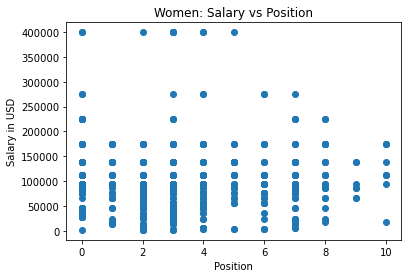

In [12]:
plt.scatter(Women_df.Position, Women_df.Salary)
plt.xlabel('Position')
plt.ylabel('Salary in USD')
plt.title('Women: Salary vs Position')
plt.show()

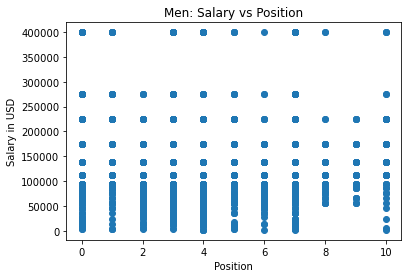

In [13]:
plt.scatter(Men_df.Position, Men_df.Salary)
plt.xlabel('Position')
plt.ylabel('Salary in USD')
plt.title('Men: Salary vs Position')
plt.show()

In [14]:
Women_X = Women_df['Position']
Men_X = Men_df['Position']

In [15]:
Women_X = Women_df.Position.values.reshape(-1, 1)
Men_X = Men_df.Position.values.reshape(-1, 1)

In [16]:
Women_y = Women_df.Salary
Men_y = Men_df.Salary

In [17]:
from sklearn.linear_model import LinearRegression
Women_model = LinearRegression()
Men_model = LinearRegression()

In [18]:
Women_model.fit(Women_X, Women_y)

LinearRegression()

In [19]:
Men_model.fit(Men_X, Men_y)

LinearRegression()

In [20]:
Women_y_pred = Women_model.predict(Women_X)
print(Women_y_pred.shape)

(885,)


In [21]:
Men_y_pred = Men_model.predict(Men_X)
print(Men_y_pred.shape)

(3903,)


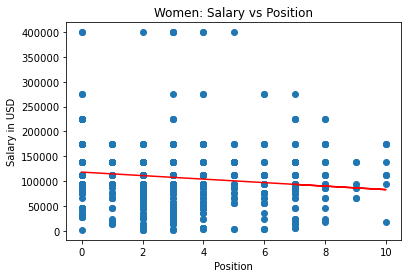

In [22]:
plt.scatter(Women_X, Women_y)
plt.plot(Women_X, Women_y_pred, color='red')
plt.xlabel('Position')
plt.ylabel('Salary in USD')
plt.title('Women: Salary vs Position')
plt.show()

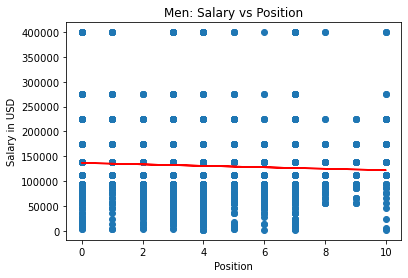

In [23]:
plt.scatter(Men_X, Men_y)
plt.plot(Men_X, Men_y_pred, color='red')
plt.xlabel('Position')
plt.ylabel('Salary in USD')
plt.title('Men: Salary vs Position')
plt.show()

In [24]:
print(Women_model.coef_)
print(Women_model.intercept_)

[-3532.79544396]
118058.08528390215


In [25]:
print(Men_model.coef_)
print(Men_model.intercept_)

[-1463.00790722]
136547.62201777668


In [26]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Women_X1 = sm.add_constant(Women_X)
result = sm.OLS(Women_y, Women_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.02311120955851198 0.02200488023751379


In [27]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Men_X1 = sm.add_constant(Men_X)
result = sm.OLS(Men_y, Men_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.0032574537589203922 0.003001944262319367
